# Wine Reviews

Comp 562 final project by Chris Burgess, Justin Do, Rhea Gupta, and Kyuyeon Kim.

This project is going to be based around a dataset of win reviews. Our goal is to creat models that are able to make predictions about the kind of grape, score, and area of growth. We are first going to look at cleaning the data and presenting some basic statistics. Then we will move onto how we made the models and lastly how they performed. 

End Goal: create a model that can identify the variety, winery, and location of a wine based on a description.

## Importing and Cleaning

In [24]:
import numpy as np
import pandas as pd
import keras as k
# import pandas_bokeh
import matplotlib.pyplot as plt
import re

# pd.set_option('plotting.backend', 'pandas_bokeh')
# pandas_bokeh.output_notebook()

In [25]:
# different environments may not correctly have a working dir. Change this line as appropriate
path_to_data = r"C:\Users\cburg\Documents\wine\data\winemag-data-130k-v2.csv"
df = pd.read_csv(path_to_data)
df = df.drop(columns=['Unnamed: 0'])


In [26]:
df.head(3)
print(df.columns)

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


In [27]:
# Compute a year column for the data

year_reg = r'[12][0-9]{3}'
years = []
for title in df['title']:
    year_result = re.search(year_reg, title)
    if year_result is None:
        years.append(0)
    else:
        years.append(int(year_result.group(0)))

df['year'] = years

df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


## Examining the data

In this section we are just going to look at the data and see how it is generally distributed.

### Country

<AxesSubplot:ylabel='None'>

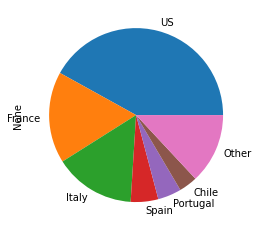

In [28]:
top_num = 6
countries = df['country'].unique()
countries_count = df['country'].value_counts()[:top_num]
countries_count_other = df['country'].value_counts()[top_num:]
ccos = countries_count_other.sum()
countries_count = countries_count.append(pd.Series(ccos, index=['Other']))

# print(countries_count)
countries_count.plot.pie()

### Variety

<AxesSubplot:ylabel='variety'>

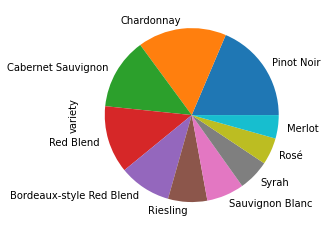

In [29]:
top_num = 10
varieties = df['variety'].unique()
varieties_count = df['variety'].value_counts()[:top_num]
varieties_count_other = df['variety'].value_counts()[top_num:]
ccos = varieties_count_other.sum()
countries_count = varieties_count.append(pd.Series(ccos, index=['Other']))

# print(countries_count)
varieties_count.plot.pie()


In [30]:
df['price'].value_counts()

20.0      6940
15.0      6066
25.0      5805
30.0      4951
18.0      4883
          ... 
216.0        1
247.0        1
1900.0       1
602.0        1
820.0        1
Name: price, Length: 390, dtype: int64

lets use country, designation, points, province, region_1, region_2, variety, winery, and year to try to predict the price of wine

In [31]:
# inputs
m1d = df[df['price'] > 0]
x = m1d[['country', 'province', 'region_1', 'region_2', 'winery', 'variety', 'points', 'year', 'designation']]
y = m1d[['price']]

x = x.values

y = y.values

array([[15.],
       [14.],
       [13.],
       ...,
       [30.],
       [32.],
       [21.]])

In [39]:
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
129968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
